In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time
import multiprocessing  as mp
from itertools import product,permutations,combinations

from keras.models import Sequential,Model
from keras.layers import *#Dense, Input, Concatenate, Lambda,LSTM,Dropout,Layer,Flatten
from keras.layers import ConvLSTM2D,BatchNormalization,TimeDistributed,MaxPooling3D
from keras.optimizers import RMSprop, Adam
import keras.losses as kl 
import pydot

from keras import optimizers
import keras

import pickle
''
import tensorflow as tf

import sys
import warnings
import os
from functions import * 

import itertools
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

# os.mkdir('out')

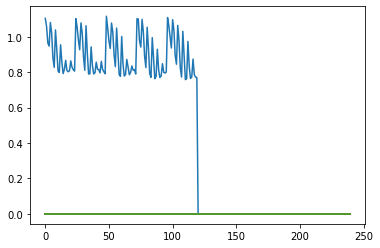

In [12]:
in_dt_dic = dict({30:[1,5,10,20,40,60,100]
              ,60: [1,5,10,20,40,60]
              ,120: [1,5,10,20,40,60]
              ,300: [1,5,10,20]
              ,900: [1,2,5]
              })
i = 0
fig = plt.figure()
ax = fig.gca()

for dt in [30,60]:
    dt = int(dt)
    for in_dt in in_dt_dic[dt]:
        in_dt = int(in_dt)
        i += 1
        
        
        with open('/gneven/ETH/Sem2/Projeckt/Pyhton/Alexis_out/outs_Code1/Results%i_%i_1.pickle' %(dt,in_dt),'rb') as pelo:
            test = pickle.load(pelo)
        ax.plot(test[:,0])


<IPython.core.display.Javascript object>


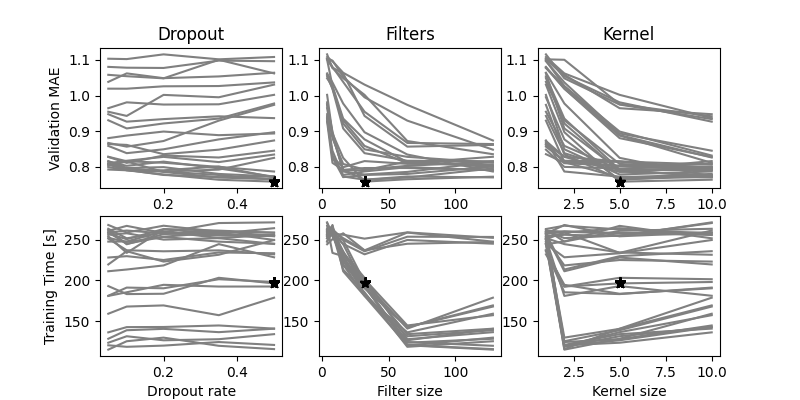

In [82]:
%matplotlib notebook
dt = 30
in_dt = 1
fig = plt.figure(3,figsize = (8,4))
ax1 = plt.subplot(1,3,1)

with open('/gneven/ETH/Sem2/Projeckt/Pyhton/Alexis_out/outs_Code1/Results%i_%i_1.pickle' %(dt,in_dt),'rb') as pelo:
            test = pickle.load(pelo)
        
# ax.plot(test[:,-1])

test_pd = pd.DataFrame(test,columns=['error','Filter','Kernel','NL','Dropout','time'])
test_pd = test_pd.drop('NL',axis = 1)
# pd.plotting.scatter_matrix(test_pd)

test_pd = test_pd.loc[test_pd['error'] != 0]
best = test_pd.sort_values('error',ascending=True).iloc[0]

filters = [4,8,16,32,64,128]
kernel = [1,2,5,10]
dropout = [0.05,0.1,0.2,0.35,0.5]

ax11 = plt.subplot(2,3,1)
ax12 = plt.subplot(2,3,4)

for f in filters:
    for k in kernel:
        ax11.plot(test_pd.loc[(test_pd['Filter'] == f)&(test_pd['Kernel'] == k),'Dropout']
            ,test_pd.loc[(test_pd['Filter'] == f)&(test_pd['Kernel'] == k),'error'],'grey',label = 'error')
        ax12.plot(test_pd.loc[(test_pd['Filter'] == f)&(test_pd['Kernel'] == k),'Dropout']
            ,test_pd.loc[(test_pd['Filter'] == f)&(test_pd['Kernel'] == k),'time'],'grey',label = 'Time')
        ax11.plot(best['Dropout'],best['error'],marker = '*',color = 'black',markersize = 8)
        ax12.plot(best['Dropout'],best['time'],marker = '*',color = 'black',markersize = 8)

ax11.set(title = 'Dropout',ylabel= 'Validation MAE')
ax12.set(ylabel= 'Training Time [s]')
ax12.set(xlabel = 'Dropout rate')

ax21 = plt.subplot(2,3,2)
ax22 = plt.subplot(2,3,5)

for d in dropout:
    for k in kernel:
        ax21.plot(test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Kernel'] == k),'Filter']
            ,test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Kernel'] == k),'error'],'grey',label = 'error')
        ax22.plot(test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Kernel'] == k),'Filter']
            ,test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Kernel'] == k),'time'],'grey',label = 'Time')
        ax21.plot(best['Filter'],best['error'],marker = '*',color = 'black',markersize = 8)
        ax22.plot(best['Filter'],best['time'],marker = '*',color = 'black',markersize = 8)

ax21.set(title = 'Filters')
ax22.set(xlabel = 'Filter size')

ax31 = plt.subplot(2,3,3)
ax32 = plt.subplot(2,3,6)

for d in dropout:
    for f in filters:
        ax31.plot(test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Filter'] == f),'Kernel']
            ,test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Filter'] == f),'error'],'grey',label = 'error')
        ax32.plot(test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Filter'] == f),'Kernel']
            ,test_pd.loc[(test_pd['Dropout'] == d)&(test_pd['Filter'] == f),'time'],'grey',label = 'Time')
        ax31.plot(best['Kernel'],best['error'],marker = '*',color = 'black',markersize = 8)
        ax32.plot(best['Kernel'],best['time'],marker = '*',color = 'black',markersize = 8)

ax31.set(title = 'Kernel')
ax32.set(xlabel = 'Kernel size')
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/tuning.pdf')

<IPython.core.display.Javascript object>


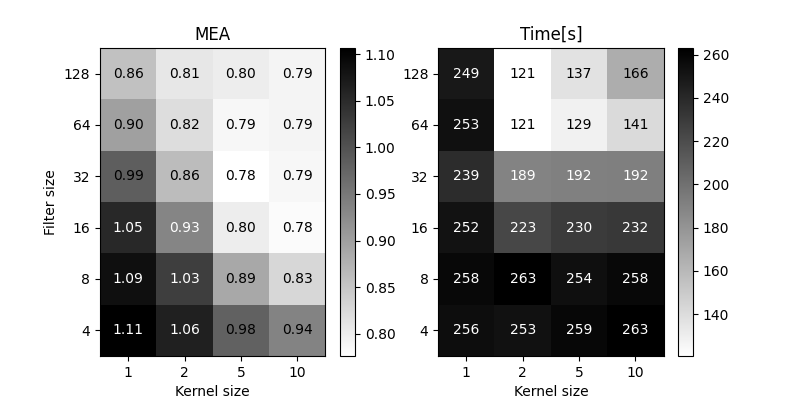

In [83]:
plot3d_e = np.empty((len(filters),len(kernel)))
plot3d_t = np.empty((len(filters),len(kernel)))

for k in range(len(kernel)):
    for f in range(len(filters)):
        plot3d_e[f,k] = np.mean(test_pd.loc[(test_pd['Kernel'] == kernel[k])&(test_pd['Filter'] == filters[f]),'error'])
        plot3d_t[f,k] = np.mean(test_pd.loc[(test_pd['Kernel'] == kernel[k])&(test_pd['Filter'] == filters[f]),'time'])

fig = plt.figure(4,figsize = (8,4))
ax = plt.subplot(1,2,1)

plot = ax.imshow(plot3d_e,origin='Higer',cmap = 'gray_r', interpolation='nearest', aspect='auto')
ax.set(xlabel = 'Kernel size',ylabel = 'Filter size',title = 'MEA')
plt.xticks(range(4),labels = kernel)
plt.yticks(range(6),labels = filters)
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i<3 ) & (j<2):
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center")


ax = plt.subplot(1,2,2)

plot = ax.imshow(plot3d_t,origin='Higer',cmap = 'gray_r', interpolation='nearest' ,aspect='auto')
ax.set(xlabel = 'Kernel size',title = 'Time[s]')
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i>3 ) & (j>0):
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center")
        else:
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center", color="w")
plt.xticks(range(4),labels = kernel)
plt.yticks(range(6),labels = filters)
filters = [4,8,16,32,64,128]
kernel = [1,2,5,10]
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/Filter_Kernel.pdf')

#             text = ax.text(j, i, ('%.2f' %plot3d[i, j]),
#                        ha="center", va="center", color="w")

<IPython.core.display.Javascript object>


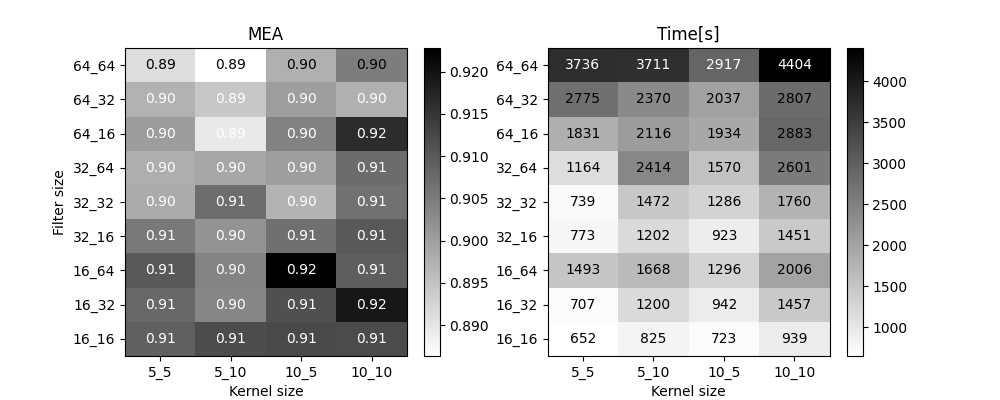

In [84]:

    
%matplotlib notebook


with open('/gneven/ETH/Sem2/Projeckt/Pyhton/DataPickles/Results2_final.pickle','rb') as eplo :
    results = pickle.load(eplo)
        
# ax.plot(test[:,-1])

resultsNL2 = pd.DataFrame(results,columns=['error','Filter','Kernel','NL','Dropout','time'])
resultsNL2 = resultsNL2.loc[resultsNL2['error'] != 0]

for i in range(resultsNL2.shape[0]) : 
    resultsNL2.loc[i,'Kernel_str'] = ("%i_%i" %(resultsNL2.loc[i,'Kernel'][0],resultsNL2.loc[i,'Kernel'][1]))
    resultsNL2.loc[i,'Filter_str'] = ("%i_%i" %(resultsNL2.loc[i,'Filter'][0],resultsNL2.loc[i,'Filter'][1]))
resultsNL2 = resultsNL2.drop(['NL'],axis = 1)


filters = [16,32,64]
filters = np.array(np.meshgrid(filters,filters)).T.reshape(-1,2)
kernel = [5,10]
kernel = np.array(np.meshgrid(kernel,kernel)).T.reshape(-1,2)
dropout = [0.4]

filters_str= np.empty(filters.shape[0]).astype('str')
kernel_str= np.empty(kernel.shape[0]).astype('str')

for i in range(filters.shape[0]):filters_str[i] = ('%i_%i' %(filters[i][0],filters[i][1]))
for i in range(kernel.shape[0]):kernel_str[i] = ('%i_%i' %(kernel[i][0],kernel[i][1]))

plot3d_e = np.empty((len(filters_str),len(kernel_str)))
plot3d_t = np.empty((len(filters_str),len(kernel_str)))

for k in range(len(kernel_str)):
    for f in range(len(filters_str)):
        plot3d_e[f,k] = np.mean(resultsNL2.loc[(resultsNL2['Kernel_str'] == kernel_str[k])&(resultsNL2['Filter_str'] == filters_str[f]),'error'])
        plot3d_t[f,k] = np.mean(resultsNL2.loc[(resultsNL2['Kernel_str'] == kernel_str[k])&(resultsNL2['Filter_str'] == filters_str[f]),'time'])

fig = plt.figure(4,figsize = (10,4))
ax = plt.subplot(1,2,1)

plot = ax.imshow(plot3d_e,origin='Higer',cmap = 'gray_r', interpolation='nearest', aspect='auto')
ax.set(xlabel = 'Kernel size',ylabel = 'Filter size',title = 'MEA')
plt.xticks(range(kernel_str.shape[0]),labels = kernel_str)
plt.yticks(range(filters_str.shape[0]),labels = filters_str)
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i<8 ):
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center")


ax = plt.subplot(1,2,2)

plot = ax.imshow(plot3d_t,origin='Higer',cmap = 'gray_r', interpolation='nearest', aspect='auto')
ax.set(xlabel = 'Kernel size',title = 'Time[s]')
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i<8 ):
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center")
        else:
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center", color="w")
plt.xticks(range(kernel_str.shape[0]),labels = kernel_str)
plt.yticks(range(filters_str.shape[0]),labels = filters_str)
filters = [4,8,16,32,64,128]
kernel = [1,2,5,10]
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/Filter_Kernel_2.pdf')

#             text = ax.text(j, i, ('%.2f' %plot3d[i, j]),
#                        ha="center", va="center", color="w")

<IPython.core.display.Javascript object>


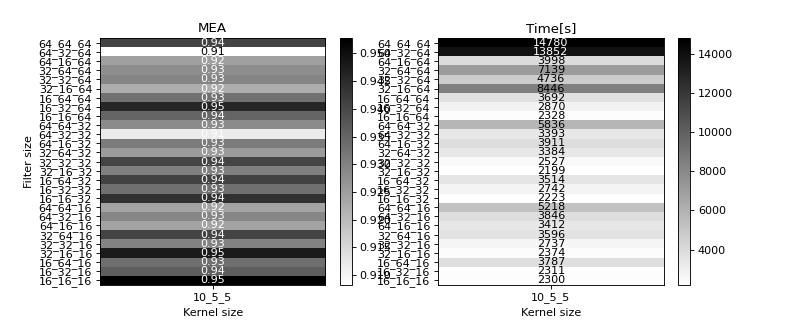

In [56]:
%matplotlib notebook

with open('/gneven/ETH/Sem2/Projeckt/Pyhton/DataPickles/Results3_down.pickle','rb') as eplo :
    results_down = pickle.load(eplo)
with open('/gneven/ETH/Sem2/Projeckt/Pyhton/DataPickles/Results3_up.pickle','rb') as eplo :
    results_up = pickle.load(eplo)


resultsNL3_down = pd.DataFrame(results_down,columns=['error','Filter','Kernel','NL','Dropout','time'])
resultsNL3_down = resultsNL3_down.loc[resultsNL3_down['error'] != 0]

resultsNL3_up = pd.DataFrame(results_up,columns=['error','Filter','Kernel','NL','Dropout','time'])
resultsNL3_up = resultsNL3_up.loc[resultsNL3_up['error'] != 0]

resultsNL3 = pd.concat([resultsNL3_down,resultsNL3_up])

resultsNL3 = resultsNL3.reset_index()
for i in range(resultsNL3.shape[0]) : 
    resultsNL3.loc[i,'Kernel_str'] = ("%i_%i_%i" %(resultsNL3.loc[i,'Kernel'][0],resultsNL3.loc[i,'Kernel'][1],resultsNL3.loc[i,'Kernel'][2]))
    resultsNL3.loc[i,'Filter_str'] = ("%i_%i_%i" %(resultsNL3.loc[i,'Filter'][0],resultsNL3.loc[i,'Filter'][1],resultsNL3.loc[i,'Filter'][2]))
resultsNL3 = resultsNL3.drop(['NL'],axis = 1)


filters = [16,32,64]
filters = np.array(np.meshgrid(filters,filters,filters)).T.reshape(-1,3)
kernel = np.array([[10,5,5]])
dropout = [0.4]

filters_str= np.empty(filters.shape[0]).astype('str')
kernel_str= np.empty(kernel.shape[0]).astype('str')

for i in range(filters.shape[0]):filters_str[i] = ('%i_%i_%i' %(filters[i][0],filters[i][1],filters[i][2]))
for i in range(kernel.shape[0]):kernel_str[i] = ('%i_%i_%i' %(kernel[i][0],kernel[i][1],kernel[i][2]))

plot3d_e = np.empty((len(filters_str),len(kernel_str)))
plot3d_t = np.empty((len(filters_str),len(kernel_str)))

for k in range(len(kernel_str)):
    for f in range(len(filters_str)):
        plot3d_e[f,k] = np.mean(resultsNL3.loc[(resultsNL3['Kernel_str'] == kernel_str[k])&(resultsNL3['Filter_str'] == filters_str[f]),'error'])
        plot3d_t[f,k] = np.mean(resultsNL3.loc[(resultsNL3['Kernel_str'] == kernel_str[k])&(resultsNL3['Filter_str'] == filters_str[f]),'time'])

fig = plt.figure(4,figsize = (10,4))
ax = plt.subplot(1,2,1)

plot = ax.imshow(plot3d_e,origin='Higer',cmap = 'gray_r', interpolation='nearest', aspect='auto')
ax.set(xlabel = 'Kernel size',ylabel = 'Filter size',title = 'MEA')
plt.xticks(range(kernel_str.shape[0]),labels = kernel_str)
plt.yticks(range(filters_str.shape[0]),labels = filters_str)
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i != 25 | (i != 16) ):
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, ('%.2f' %plot3d_e[i, j]),
                       ha="center", va="center")


ax = plt.subplot(1,2,2)

plot = ax.imshow(plot3d_t,origin='Higer',cmap = 'gray_r', interpolation='nearest', aspect='auto')
ax.set(xlabel = 'Kernel size',title = 'Time[s]')
plt.colorbar(plot,shrink = 1)

for i in range(plot3d_e.shape[0]):
    for j in range(plot3d_e.shape[1]):
        if (i<25 ):
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center")
        else:
            text = ax.text(j, i, ('%.0f' %plot3d_t[i, j]),
                       ha="center", va="center", color="w")
plt.xticks(range(kernel_str.shape[0]),labels = kernel_str)
plt.yticks(range(filters_str.shape[0]),labels = filters_str)
filters = [4,8,16,32,64,128]
kernel = [1,2,5,10]
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/Filter_Kernel_2.pdf')

#             text = ax.text(j, i, ('%.2f' %plot3d[i, j]),
#                        ha="center", va="center", color="w")

<IPython.core.display.Javascript object>


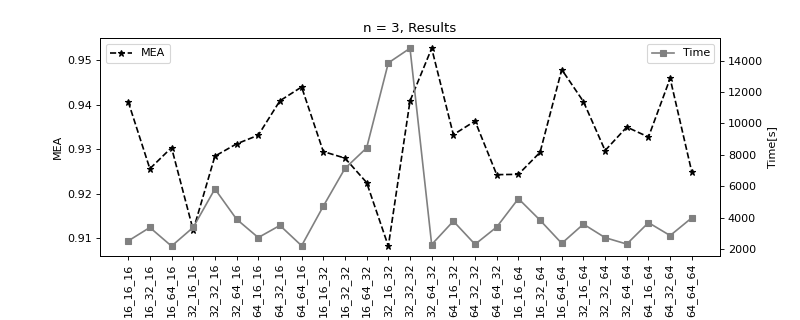

In [96]:
fig = plt.figure(6,figsize = (10,4))
ax1 = fig.gca()

plt.xticks(range(filters_str.shape[0]),labels = filters_str,rotation=90)

ax2 = ax1.twinx() 
ax1.plot(resultsNL3['error'],'--*',color = 'black',label = 'MEA')
ax2.plot(resultsNL3['time'],'-s',label = 'Time',color='grey')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

ax1.set(xlabel = 'Filters',ylabel = 'MEA',title = 'n = 3, Results')
ax2.set(ylabel = 'Time[s]')
plt.subplots_adjust(bottom=0.2)
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/Filter_Kernel_2b.pdf')


<IPython.core.display.Javascript object>


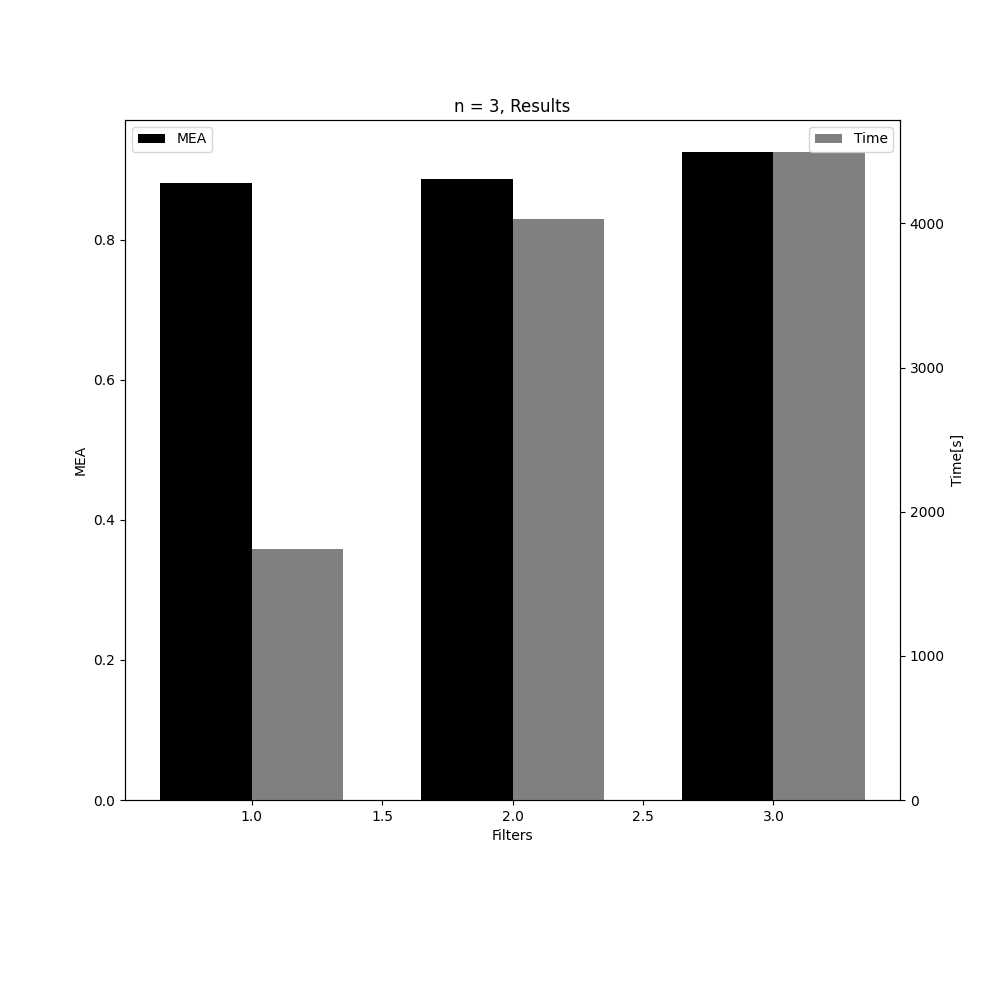

In [122]:
with open('/gneven/ETH/Sem2/Projeckt/Pyhton/DataPickles/Comp123.pickle','rb') as eplo :
    results = pickle.load(eplo)
    
width = 0.35

fig = plt.figure(7,figsize = (10,10))
ax1 = fig.gca()
ax2 = ax1.twinx() 
ax1.bar(results[:,1]-width/2,results[:,0],width,color = 'black',label = 'MEA')
ax2.bar(results[:,1]+width/2,results[:,2],width,label = 'Time',color='grey')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

ax1.set(xlabel = 'Filters',ylabel = 'MEA',title = 'n = 3, Results')
ax2.set(ylabel = 'Time[s]')
plt.subplots_adjust(bottom=0.2)
plt.savefig('/gneven/Desktop/ETH/Sem2/Projeckt/Latex/figures/Tuning/123.pdf')


f= open("/gneven/ETH/Sem2/Projeckt/Latex/tables/modelN.tex","w+")
 
f.write("\createtable[h]\n{Error with different $n$}\n{Error and time of the best of each $n$}\n{\label{tab:modelN}}\n{\\begin{tabular}{lcc}\nModel & MEA & Time [s] \\\\ \\hline \n")
for i in range(3):
    f.write("Number of layers ($n$) = %i & %.3f & %.3e \\\\" %(i+1,results[i,0],results[i,2]))

f.write('\end{tabular}}\n{}')
f.close() 


In [108]:
results[:,0]

array([0.88089517, 0.88570454, 0.92440679])